In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from models import Model
import pyExSi

# Showcase of the package ``models``

## Creating the ``Model`` object:

Let's define a lumped mass (mass-spring-damper) model, shown on the image below, with N degrees of freedom.

<img src="showcase.png" alt="Alternative text" />

For example, a system with five masses of the same wight connected by springs, where all the springs have the same stiffness value and all the dampers have the same damping coefficient value.

Define the system parameters:

In [2]:
n_dof = 5 # 5 degrees of freedom (5 masses)
mass = 1  # kg
stiffness = 150  # N/m
damping = 2  # N/m/s

We can create an object by calling the ``Model`` class. There are 4 different models available with different boundary conditions, which are passed to the object via the ``boundaries`` argument. In our case, our model is connected to the rigid surfaces on both sides (``boundaries="both"``):

In [3]:
model = Model(n_dof=n_dof, mass=mass, stiffness=stiffness, damping=damping, boundaries="both")

### Mass, stiffness and damping matrices:

Let's see the mass, stiffness and damping matrices. To get the matrices we can call the ``get_mass_matrix()``, ``get_stiffness_matrix()``, and ``get_damping_matrix()`` methods:

In [4]:
print("M = \n", model.get_mass_matrix(), "\n")
print("K = \n", model.get_stiffness_matrix(), "\n")
print("C = \n", model.get_damping_matrix(), "\n")

M = 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]] 

K = 
 [[ 300. -150.    0.    0.    0.]
 [-150.  300. -150.    0.    0.]
 [   0. -150.  300. -150.    0.]
 [   0.    0. -150.  300. -150.]
 [   0.    0.    0. -150.  300.]] 

C = 
 [[ 4. -2.  0.  0.  0.]
 [-2.  4. -2.  0.  0.]
 [ 0. -2.  4. -2.  0.]
 [ 0.  0. -2.  4. -2.]
 [ 0.  0.  0. -2.  4.]] 



We can also specify different values for each mass, spring and damper, by passing the arguments as arrays of values. Note that in our case (``boundaries="both"``), the length of the stiffness and the damping coefficients array, must be N+1 (see the image at the beginning):

In [5]:
mass = np.random.uniform(low=0.1, high=0.5, size=n_dof)  # n_dof masses
stiffness = np.random.uniform(low=300, high=900, size=n_dof+1)  # n_dof+1 springs
damping = np.random.uniform(low=0.1, high=0.5, size=n_dof+1)  # n_dof+1 dampers

Create the object:

In [6]:
model = Model(n_dof=n_dof, mass=mass, stiffness=stiffness, damping=damping, boundaries="both")

Mass, stiffness and damping matrices:

In [7]:
print("M = \n", model.get_mass_matrix(), "\n")
print("K = \n", model.get_stiffness_matrix(), "\n")
print("C = \n", model.get_damping_matrix(), "\n")

M = 
 [[0.47455077 0.         0.         0.         0.        ]
 [0.         0.24268494 0.         0.         0.        ]
 [0.         0.         0.39666966 0.         0.        ]
 [0.         0.         0.         0.41532884 0.        ]
 [0.         0.         0.         0.         0.21585678]] 

K = 
 [[1439.3975423  -586.42657665    0.            0.            0.        ]
 [-586.42657665 1426.05066743 -839.62409078    0.            0.        ]
 [   0.         -839.62409078 1343.43302685 -503.80893607    0.        ]
 [   0.            0.         -503.80893607 1319.35809821 -815.54916214]
 [   0.            0.            0.         -815.54916214 1614.5134859 ]] 

C = 
 [[ 0.59514811 -0.35831342  0.          0.          0.        ]
 [-0.35831342  0.67301045 -0.31469703  0.          0.        ]
 [ 0.         -0.31469703  0.70790467 -0.39320764  0.        ]
 [ 0.          0.         -0.39320764  0.8871471  -0.49393946]
 [ 0.          0.          0.         -0.49393946  0.9513915 ]] 



### Eigen frequencies:

To get the systems eigen frequencies we can call the ``get_eig_freq()`` method:

In [8]:
eig_freq = model.get_eig_freq()
print(eig_freq)

[ 3.83122852  7.17319805  9.30346601 14.24108116 15.02973861]


## FRFs and impulse response functions:

### Frequency response functions:

To get the frequency response functions of our system we must first define the frequency array with discrete freqeuncy values at which the FRFs are evaluated:

In [9]:
freq = np.linspace(0, 50, 5000)

Now we can calculate the FRFs via ``get_FRF_matrix()`` method with ``freq`` and ``frf_method`` arguments (see tutorial for explanation):

In [10]:
frf_matrix = model.get_FRF_matrix(freq=freq, frf_method="f")

Let's plot the resulting FRF matrix:

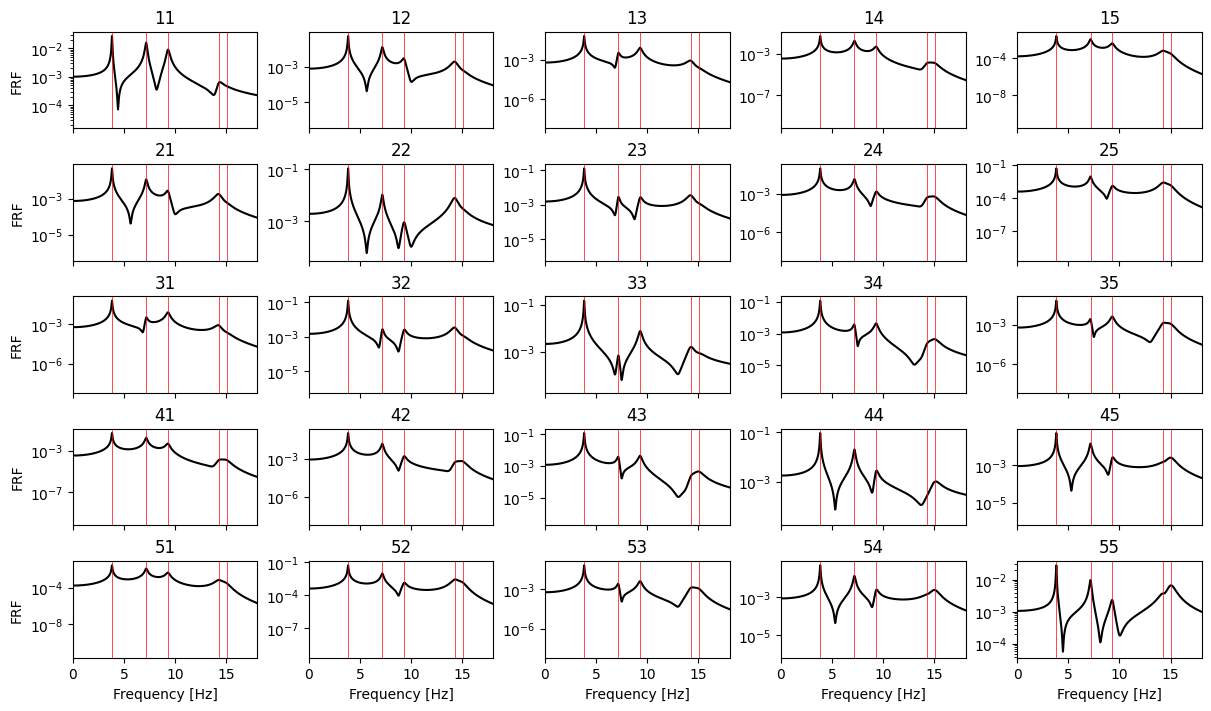

In [11]:
fig, axs = plt.subplots(frf_matrix.shape[0], frf_matrix.shape[1], figsize=(12,7), 
                        sharex=True, layout="constrained")

if frf_matrix.shape[0] == 1:
    axs.semilogy(freq, np.abs(frf_matrix[0,0,:]), "k")      
    axs.set_title(str(0+1)+str(0+1))
    axs.set_xlabel("Frequency [Hz]")
    axs.set_ylabel("FRF")
    axs.axvline(eig_freq[0], c="r", lw=0.5)
else:
    for i in range(frf_matrix.shape[0]):
        for j in range(frf_matrix.shape[1]):
            axs[i,j].semilogy(freq, np.abs(frf_matrix[i,j,:]), "k")      
            axs[i,j].set_title(str(i+1)+str(j+1))
            axs[frf_matrix.shape[1]-1,j].set_xlabel("Frequency [Hz]")
            [axs[i,j].axvline(f_r, c="r", lw=0.5) for f_r in eig_freq]
            axs[i,j].set_xlim(left=0, right=eig_freq[-1]+0.2*eig_freq[-1])
        axs[i,0].set_ylabel("FRF")

### Impulse response functions:

We can calculate the Impulse response functions via ``get_h_matrix()`` method. We can also get the time axis:

In [29]:
h_matrix, time = model.get_h_matrix(freq=freq, frf_method="f", return_t_axis=True)

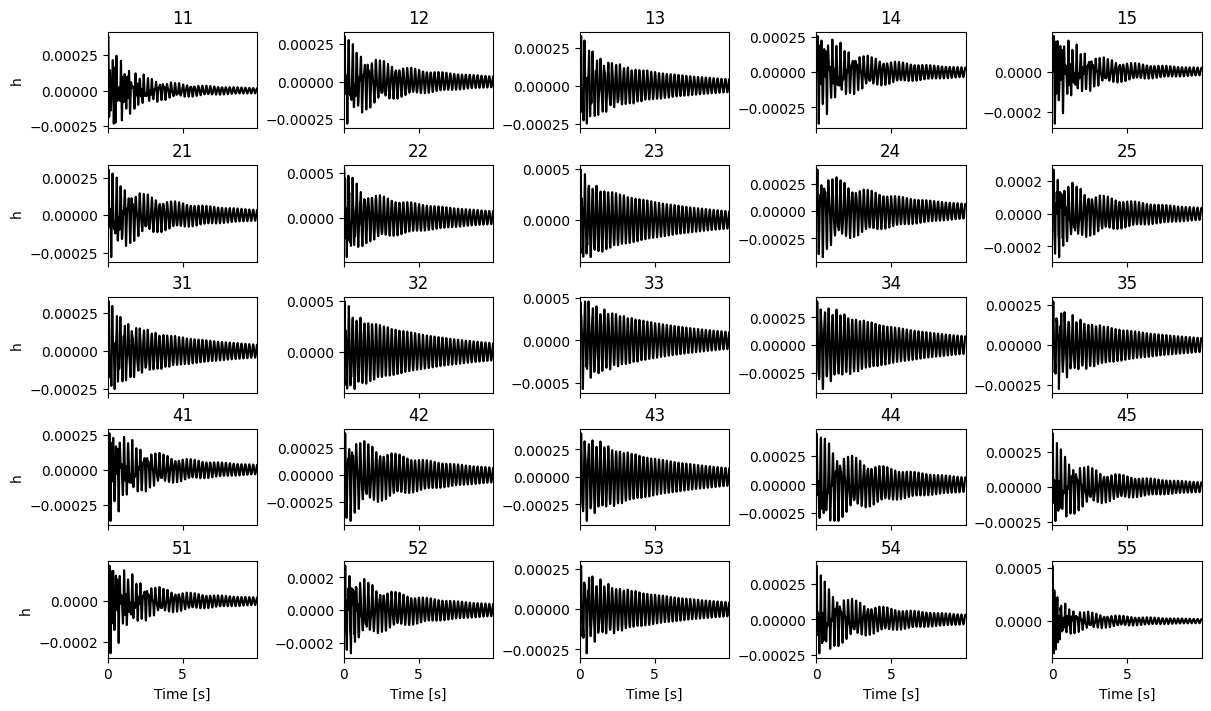

In [31]:
fig, axs = plt.subplots(h_matrix.shape[0], h_matrix.shape[1], figsize=(12,7), 
                        sharex=True, layout="constrained")

if h_matrix.shape[0] == 1:
    axs.plot(time, h_matrix[0,0,:], "k")      
    axs.set_title(str(0+1)+str(0+1))
    axs.set_xlabel("Time [s]")
    axs.set_ylabel("h")
else:
    for i in range(h_matrix.shape[0]):
        for j in range(h_matrix.shape[1]):
            axs[i,j].plot(time, h_matrix[i,j,:], "k")
            axs[i,j].set_xlim(left=0, right=time[-1]/10)       
            axs[i,j].set_title(str(i+1)+str(j+1))
            axs[h_matrix.shape[1]-1,j].set_xlabel("Time [s]")
        axs[i,0].set_ylabel("h")

## Calculating response

We can calculate the response of the masses via frequency response functions (frequency domain - ``domain="f"``) or via impulse response functions (convolution in time domain - ``domain="t"``) with ``get_response()`` method. In this example we wil show how to obtain response via FRFs (``domain="f"``).

Let's define our excitation signals with ``pyExSi`` package, their sampling rate and duration and specify which masses (excitation degrees of freedom) are the signals applied to. We must also define which responses we want to calculate. If that is not provided, the responses of all masses are calculated:

In [32]:
exc_dof = [0, 2, 4]  # first third and the last mass are excited
sampling_rate = 1000
T = 5  # duration of excitation signals
resp_dof = [0, 1, 2, 3, 4]  # calculate the responses of all masses

exc = np.zeros((len(exc_dof), int(T*sampling_rate)), dtype=float)

for i in range(len(exc_dof)):
    exc[i] = 100 * pyExSi.normal_random(N=int(T*sampling_rate))

Calculate response:

In [33]:
resp, time = model.get_response(exc_dof=exc_dof, exc=exc, sampling_rate=sampling_rate, resp_dof=resp_dof, domain="f", 
                                frf_method="f", return_matrix=False, return_t_axis=True, return_f_axis=False)

Let's plot the excitation and the obtained response signals:

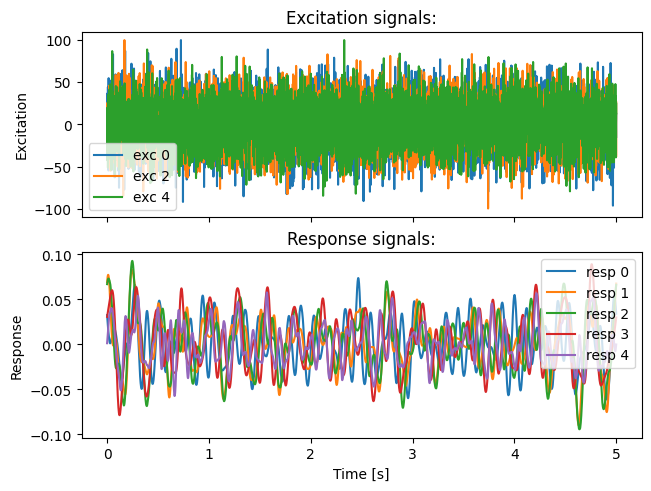

In [34]:
fig, axs = plt.subplots(2, 1, sharex=True, layout="constrained")

for i in range(exc.shape[0]):
    axs[0].plot(time, exc[i], label="exc "+str(exc_dof[i]))
    
for i in range(resp.shape[0]):
    axs[1].plot(time, resp[i], label="resp "+str(resp_dof[i]))
    
axs[0].set_title("Excitation signals:")
axs[1].set_title("Response signals:")
axs[1].set_ylabel('Response')
axs[0].set_ylabel('Excitation')
axs[1].set_xlabel('Time [s]');
axs[0].legend()
axs[1].legend();

## Other methods

There are also other methods aailable, for example, we can obtain eigen values and their conjugate pairs via ``get_eig_val()`` method. The same goes for eigen vectors via ``get_eig_vec()`` method.

We can aslo obtain viscous damping ratios of our system via ``get_damping_ratios()`` method:

In [35]:
damping_ratios = model.get_damping_ratios()
print(damping_ratios)

[0.00607374 0.01187961 0.01630037 0.02123307 0.02799196]
